1. The following python code will conduct value function iteration.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
c = 2
beta = 0.9
wages = np.arange(1,101)
prob = np.ones(100)*0.01
V_0 = np.zeros(100)
V_1 = np.zeros(100)
tol = 1e-5

In [5]:
iteration = 0
norm_difference = np.inf
tolerance = 1e-5

while norm_difference > tolerance:
    iteration += 1
    V_0 = V_1.copy()
    expected_V_0 = np.dot(prob, V_0)
    V_1 = np.maximum((wages / (1 - beta)), c + beta * expected_V_0)
    norm_difference = np.linalg.norm(V_1 - V_0)

Value function converged after 35 iterations.


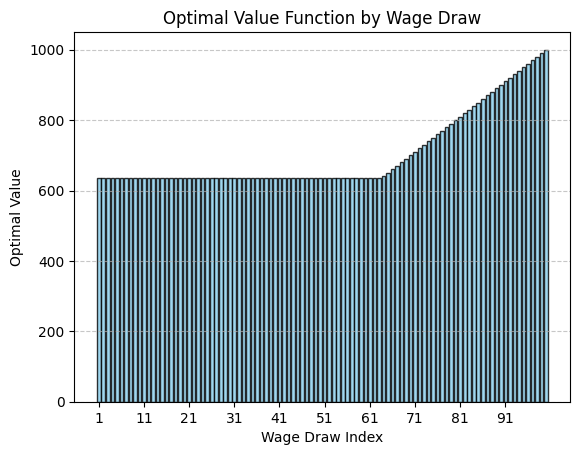

In [11]:
print(f"Value function converged after {iteration} iterations.")
plt.bar(wages, V_1, color='skyblue', edgecolor='black', alpha=0.8)
plt.title('Optimal Value Function by Wage Draw')
plt.xlabel('Wage Draw Index')
plt.ylabel('Optimal Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(np.arange(1, 101, step=10))  # Show fewer x-ticks for clarity
plt.show()

For lower wage draws the value of searching dominates (hence the flat section on the left). On the other hand, for high wage draws accepting the offer dominates creating linear returns.

2. We can see the threshold wage in the bar chart, but lets calculate it. 

In [12]:
threshold = (1-beta)*(c+beta*expected_V_0)
print(threshold)

63.52424932430203


3. Doing the same as before.

In [15]:
iteration = 0
norm_difference = np.inf
tolerance = 1e-5
wages = np.arange(1,101,dtype=float)
p = np.power(wages,-1) / np.sum(np.power(wages,-1))

while norm_difference > tolerance:
    iteration += 1
    V_0 = V_1.copy()
    expected_V_0 = np.dot(p, V_0)
    V_1 = np.maximum((wages / (1 - beta)), c + beta * expected_V_0)
    norm_difference = np.linalg.norm(V_1 - V_0)

Value function converged after 62 iterations.


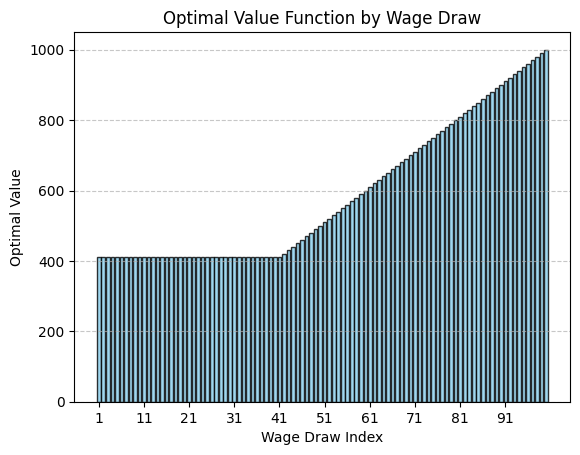

In [16]:
print(f"Value function converged after {iteration} iterations.")
plt.bar(wages, V_1, color='skyblue', edgecolor='black', alpha=0.8)
plt.title('Optimal Value Function by Wage Draw')
plt.xlabel('Wage Draw Index')
plt.ylabel('Optimal Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(np.arange(1, 101, step=10))  # Show fewer x-ticks for clarity
plt.show()

The reservation wage falls to $\sim 40$ for this case. The reason is that now the benefit of waiting is diminished in that future possiblity of a larger wage draw is smaller.

5. As $\beta \to 1$ we would expect the threshold solution to shift rightward (more paitent for a future good draw and vice versa). And raising $c$ will do the opposite. 